In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
df_wine = pd.read_csv('winequality-red.csv')

# Regarder la structure des données

In [142]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [143]:
df_wine.shape

(1599, 12)

In [144]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [145]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Repérer les valeurs manquantes

In [146]:
nan_count = df_wine.isna().sum()
nan_count

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Il n'y a pas de valeur manquante.

# Explorer les données

### Etude des corrélations entre les variables 

In [147]:
correlations = df_wine.corr()
correlations


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

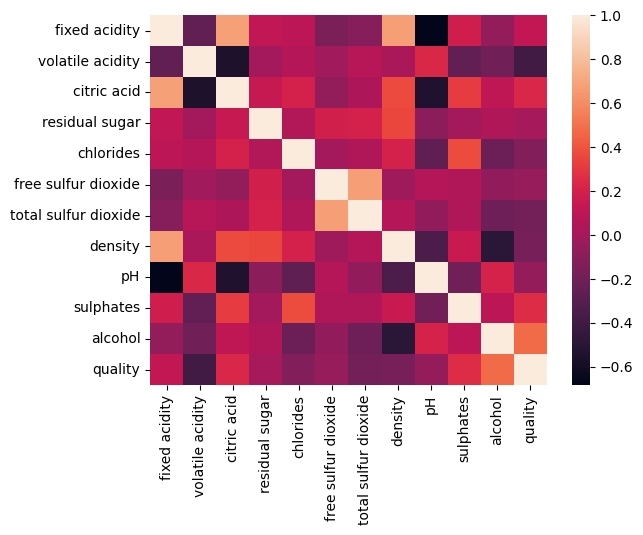

In [148]:
sns.heatmap(correlations)

Text(0.5, 1.0, 'Corrélations des différentes variables avec la qualité')

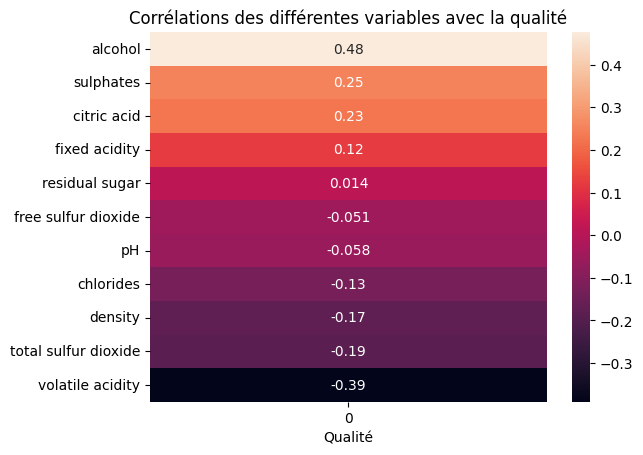

In [149]:
corr_quality = df_wine.corrwith(df_wine['quality']).drop('quality').sort_values(ascending=False)
sns.heatmap(corr_quality.to_frame(),annot=True)
plt.xlabel('Qualité')
plt.title('Corrélations des différentes variables avec la qualité')

Toutes les variables ont une corrélation significative avec la qualité.

Text(0.5, 1.0, 'Distribution des notes de qualité des vins')

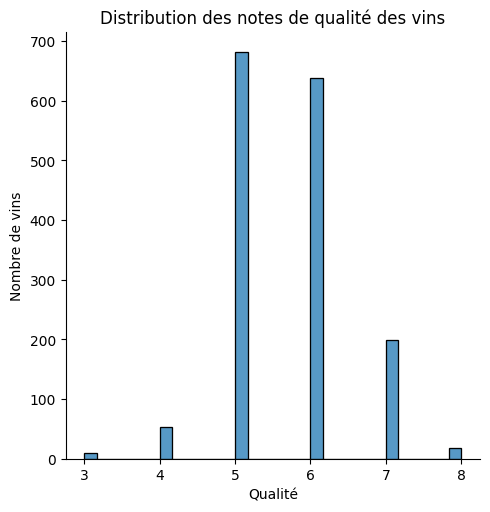

In [150]:
sns.displot(df_wine['quality'])
plt.xlabel('Qualité')
plt.ylabel('Nombre de vins')
plt.title('Distribution des notes de qualité des vins')

### Qualité et fixed acidity	

In [151]:
corr_fixed_acidity = df_wine.corrwith(df_wine['quality'])["fixed acidity"]
corr_fixed_acidity

0.12405164911322429

Text(0.5, 1.0, "Relation entre l'acidité et la qualité")

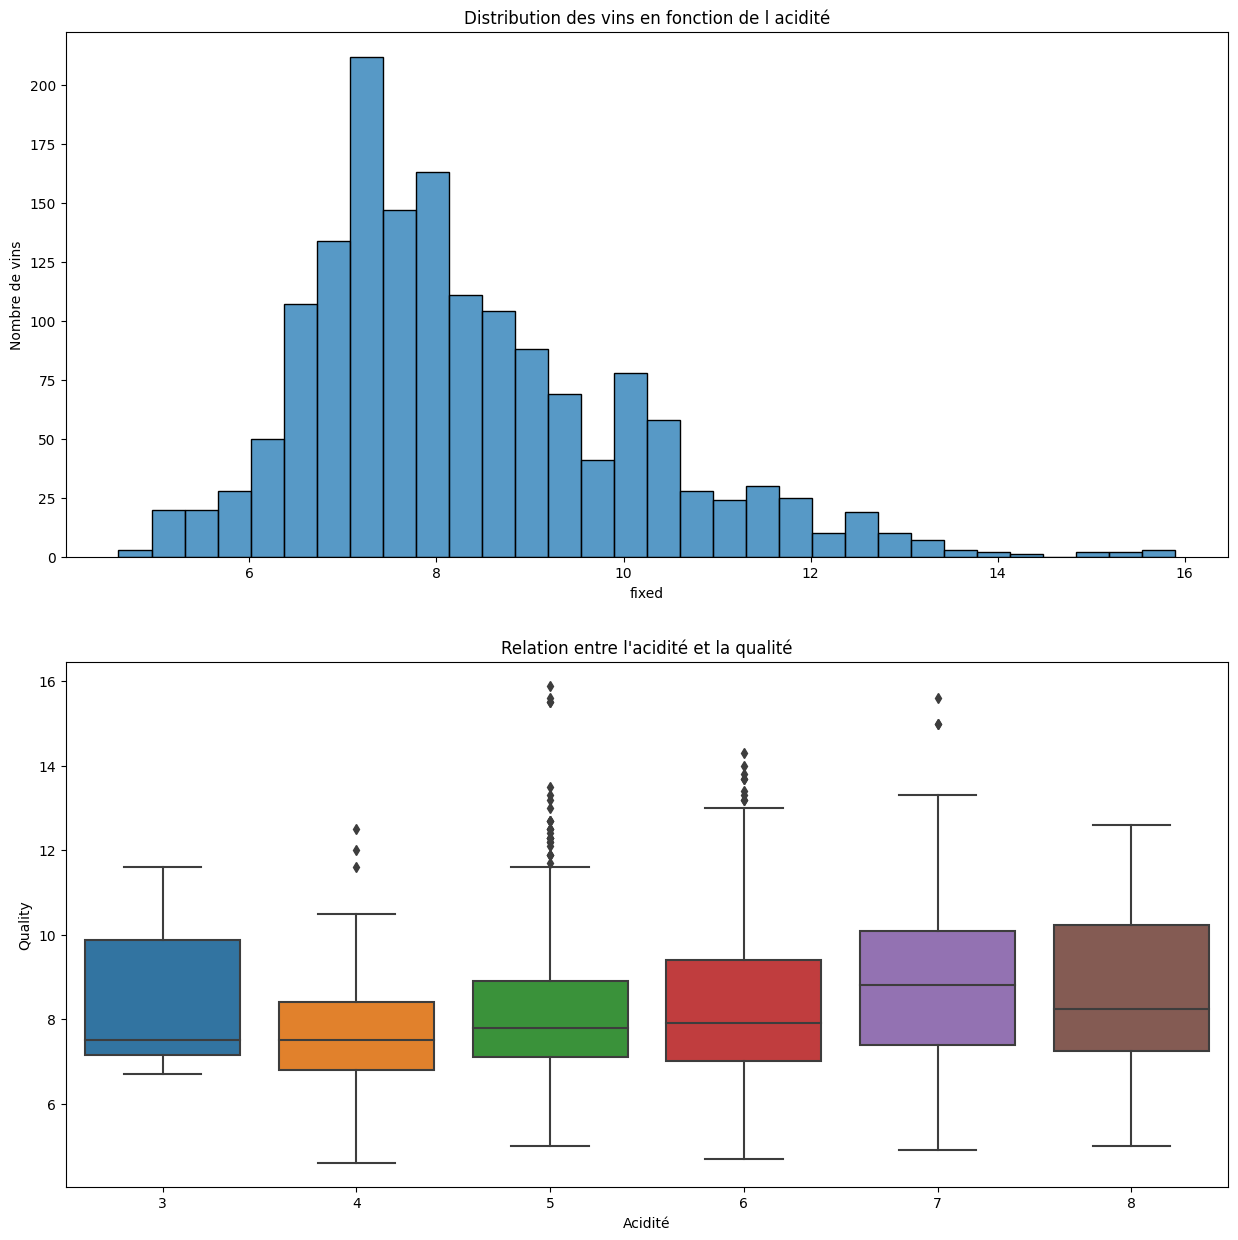

In [152]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.histplot(data=df_wine,x='fixed acidity', ax=ax1)
ax1.set_xlabel('fixed')
ax1.set_ylabel('Nombre de vins')
ax1.set_title('Distribution des vins en fonction de l acidité')

sns.boxplot(data=df_wine, x='quality', y='fixed acidity', ax=ax2)
ax2.set_xlabel('Acidité')
ax2.set_ylabel('Quality')
ax2.set_title("Relation entre l'acidité et la qualité")

### Qualité et volatile acidity	

In [153]:
corr_volatile_acidity = df_wine.corrwith(df_wine['quality'])["volatile acidity"]
corr_volatile_acidity

-0.390557780264007

Text(0.5, 1.0, "Relation entre l'acidité volatile et la qualité")

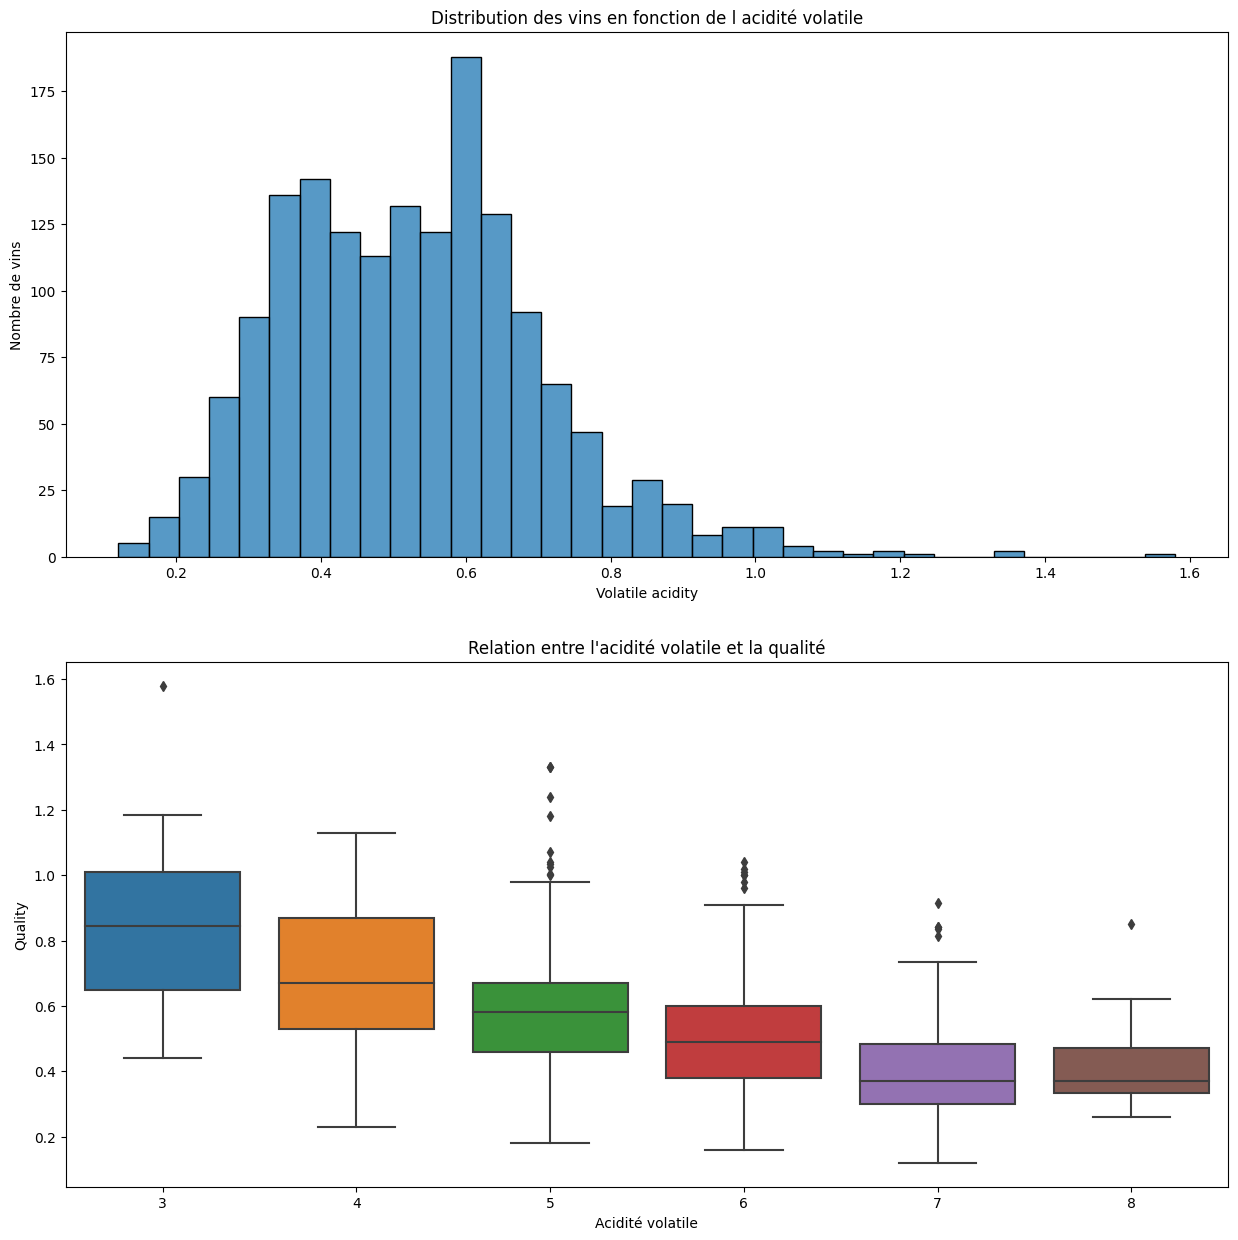

In [154]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.histplot(data=df_wine,x='volatile acidity', ax=ax1)
ax1.set_xlabel('Volatile acidity')
ax1.set_ylabel('Nombre de vins')
ax1.set_title('Distribution des vins en fonction de l acidité volatile')

sns.boxplot(data=df_wine, x='quality', y='volatile acidity', ax=ax2)
ax2.set_xlabel('Acidité volatile')
ax2.set_ylabel('Quality')
ax2.set_title("Relation entre l'acidité volatile et la qualité")

### Qualité et citric acid	

In [155]:
corr_citric_acid = df_wine.corrwith(df_wine['quality'])["citric acid"]
corr_citric_acid

0.22637251431804142

Text(0.5, 1.0, "Relation entre l'acide citrique et la qualité")

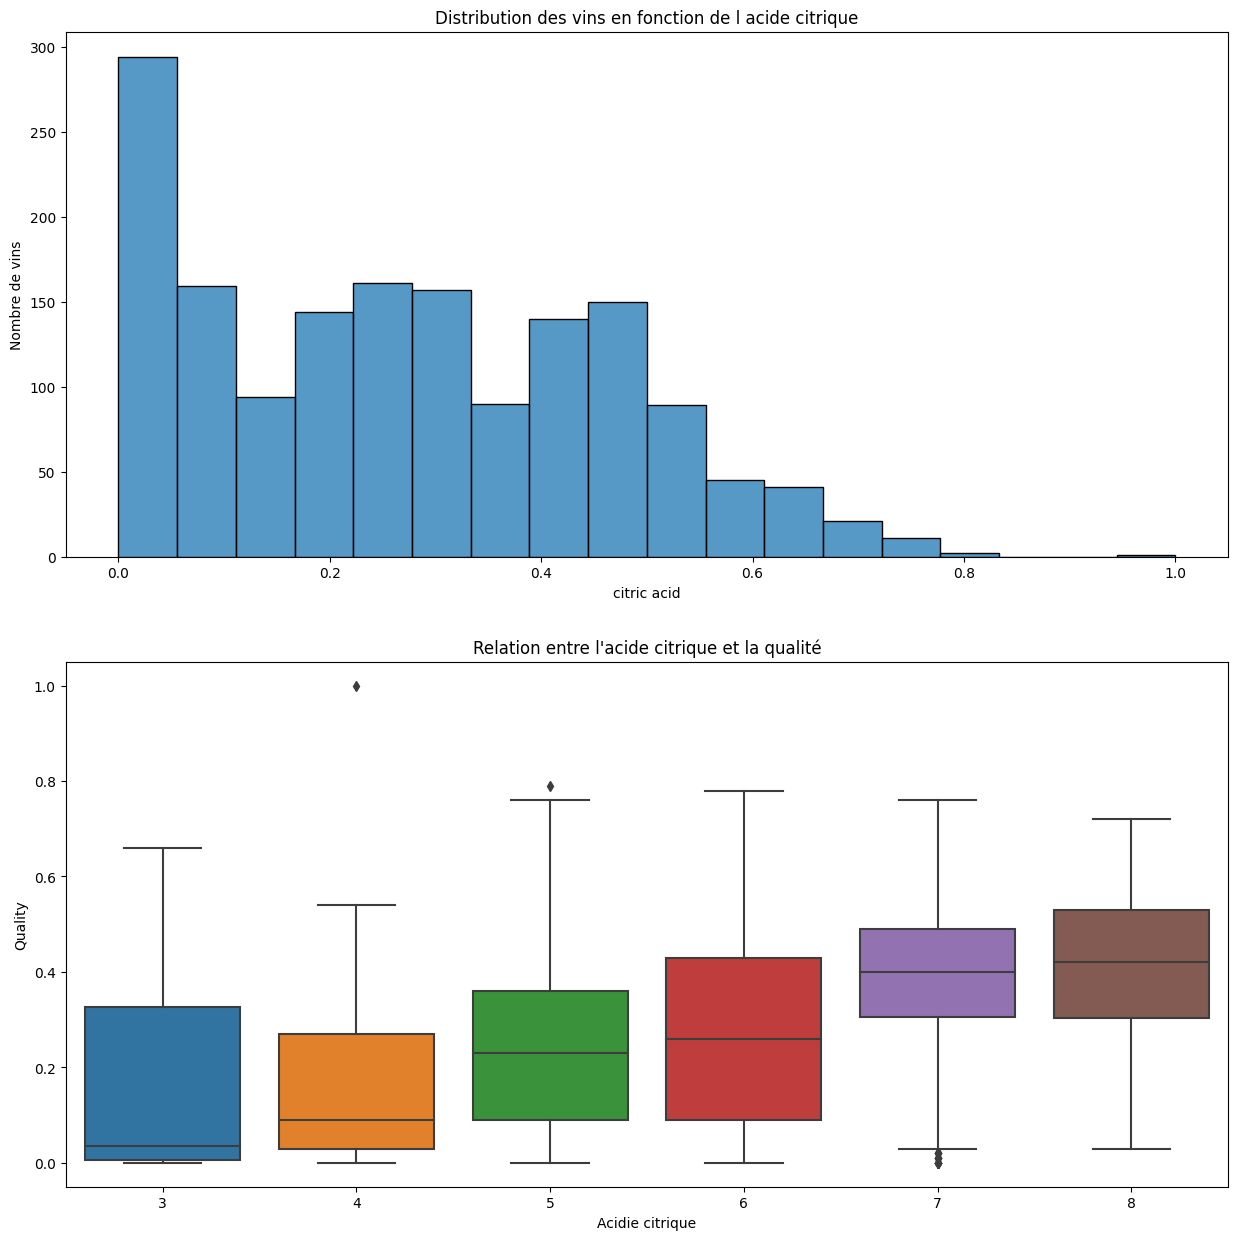

In [156]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.histplot(data=df_wine,x='citric acid', ax=ax1)
ax1.set_xlabel('citric acid')
ax1.set_ylabel('Nombre de vins')
ax1.set_title('Distribution des vins en fonction de l acide citrique')

sns.boxplot(data=df_wine, x='quality', y='citric acid', ax=ax2)
ax2.set_xlabel('Acidie citrique')
ax2.set_ylabel('Quality')
ax2.set_title("Relation entre l'acide citrique et la qualité")

### Qualité et residual sugar	

In [157]:
corr_residual_sugar = df_wine.corrwith(df_wine['quality'])["residual sugar"]
corr_residual_sugar

0.013731637340066305

Text(0.5, 1.0, 'Relation entre le sucre résiduel et la qualité')

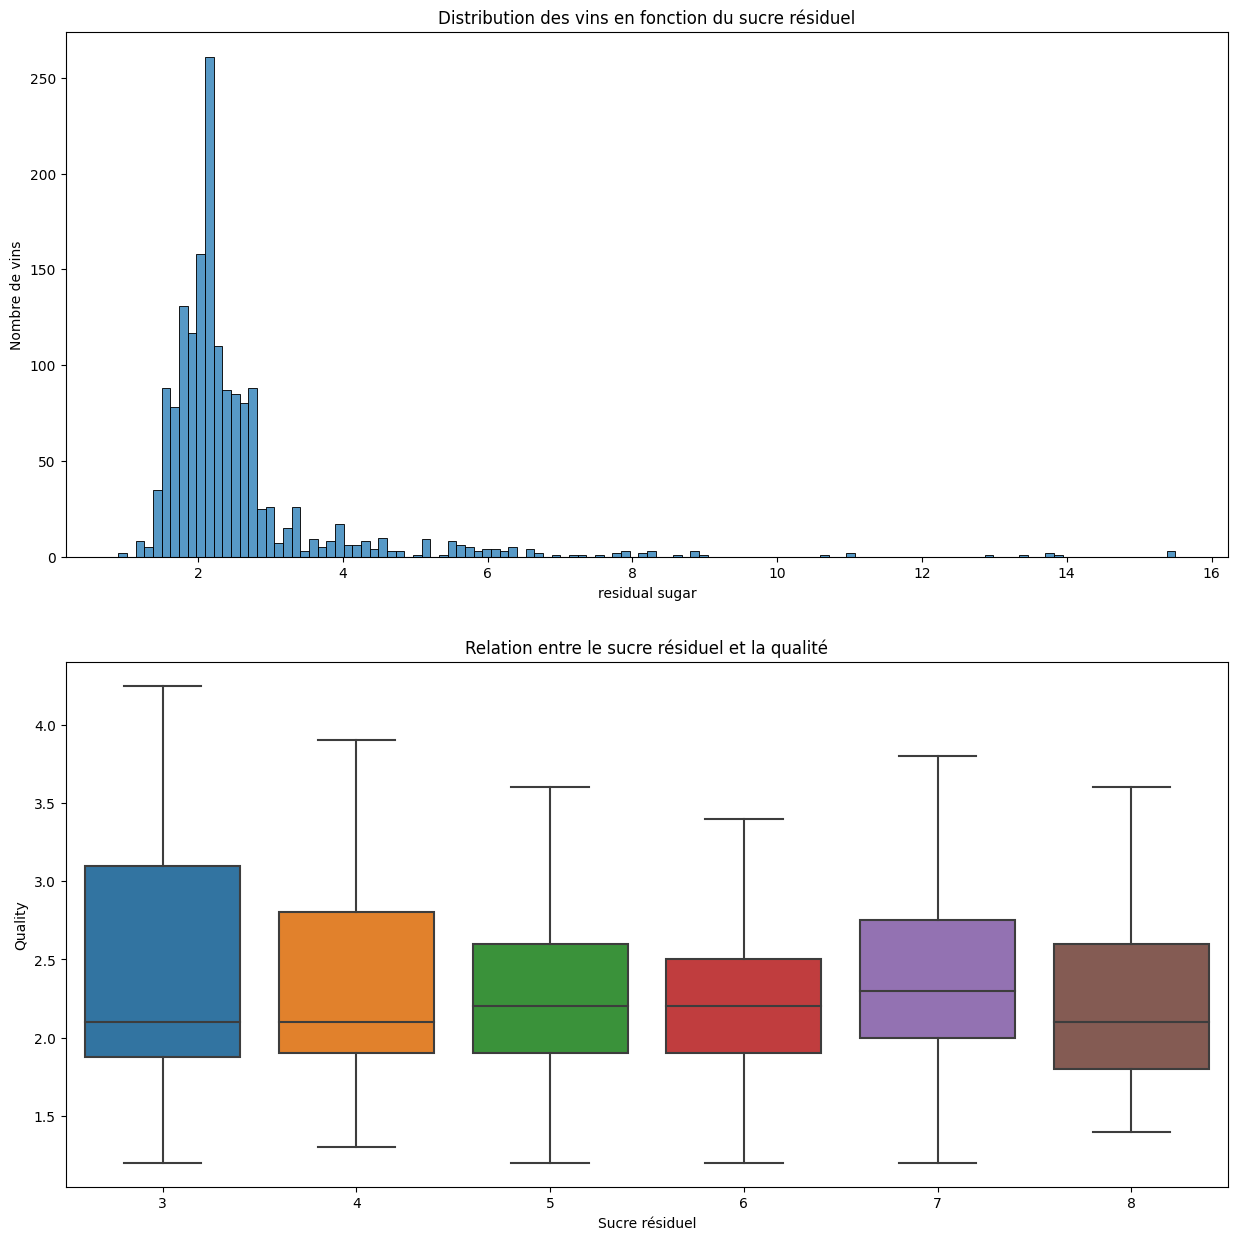

In [158]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.histplot(data=df_wine,x='residual sugar', ax=ax1)
ax1.set_xlabel('residual sugar')
ax1.set_ylabel('Nombre de vins')
ax1.set_title('Distribution des vins en fonction du sucre résiduel')

sns.boxplot(data=df_wine, x='quality', y='residual sugar', ax=ax2,showfliers=False)
ax2.set_xlabel('Sucre résiduel')
ax2.set_ylabel('Quality')
ax2.set_title("Relation entre le sucre résiduel et la qualité")

### Qualité et chlorides	

In [159]:
corr_chlorides = df_wine.corrwith(df_wine['quality'])["chlorides"]
corr_chlorides

-0.1289065599300527

Text(0.5, 1.0, 'Relation entre les chlorides et la qualité')

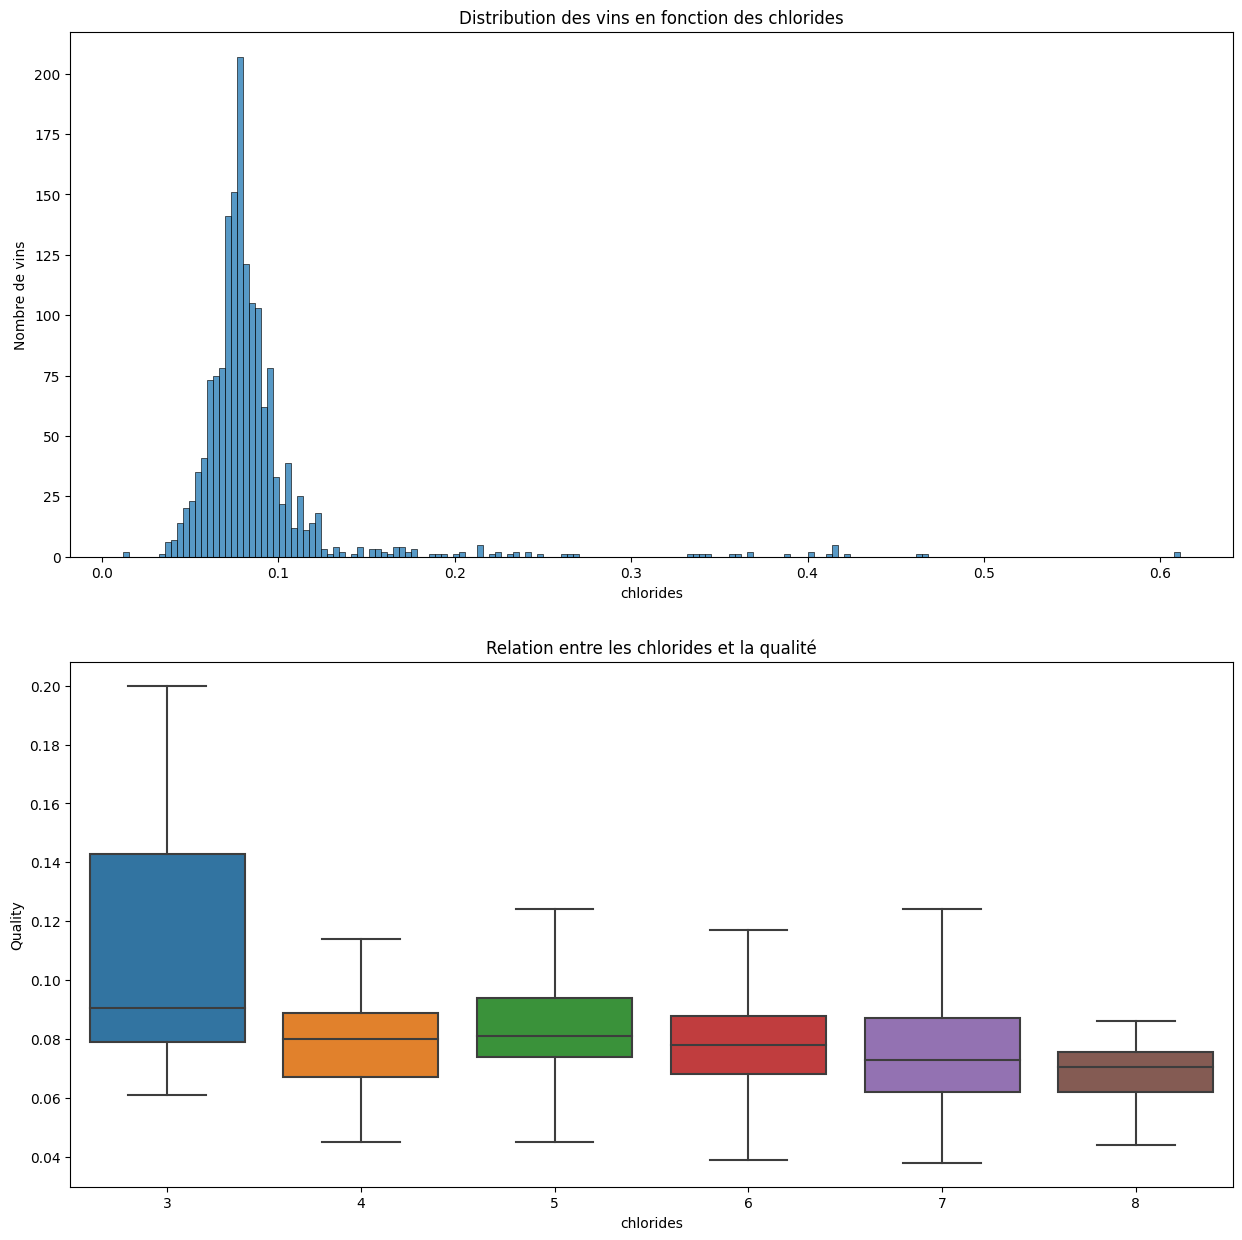

In [160]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.histplot(data=df_wine,x='chlorides', ax=ax1)
ax1.set_xlabel('chlorides')
ax1.set_ylabel('Nombre de vins')
ax1.set_title('Distribution des vins en fonction des chlorides')

sns.boxplot(data=df_wine, x='quality', y='chlorides', ax=ax2,showfliers=False)
ax2.set_xlabel('chlorides')
ax2.set_ylabel('Quality')
ax2.set_title("Relation entre les chlorides et la qualité")

### Qualité et free sulfur dioxide	

In [161]:
corr_free_sulfur_dioxides = df_wine.corrwith(df_wine['quality'])["free sulfur dioxide"]
corr_free_sulfur_dioxides

-0.050656057244276305

Text(0.5, 1.0, 'Relation entre free sulfur dioxide et la qualité')

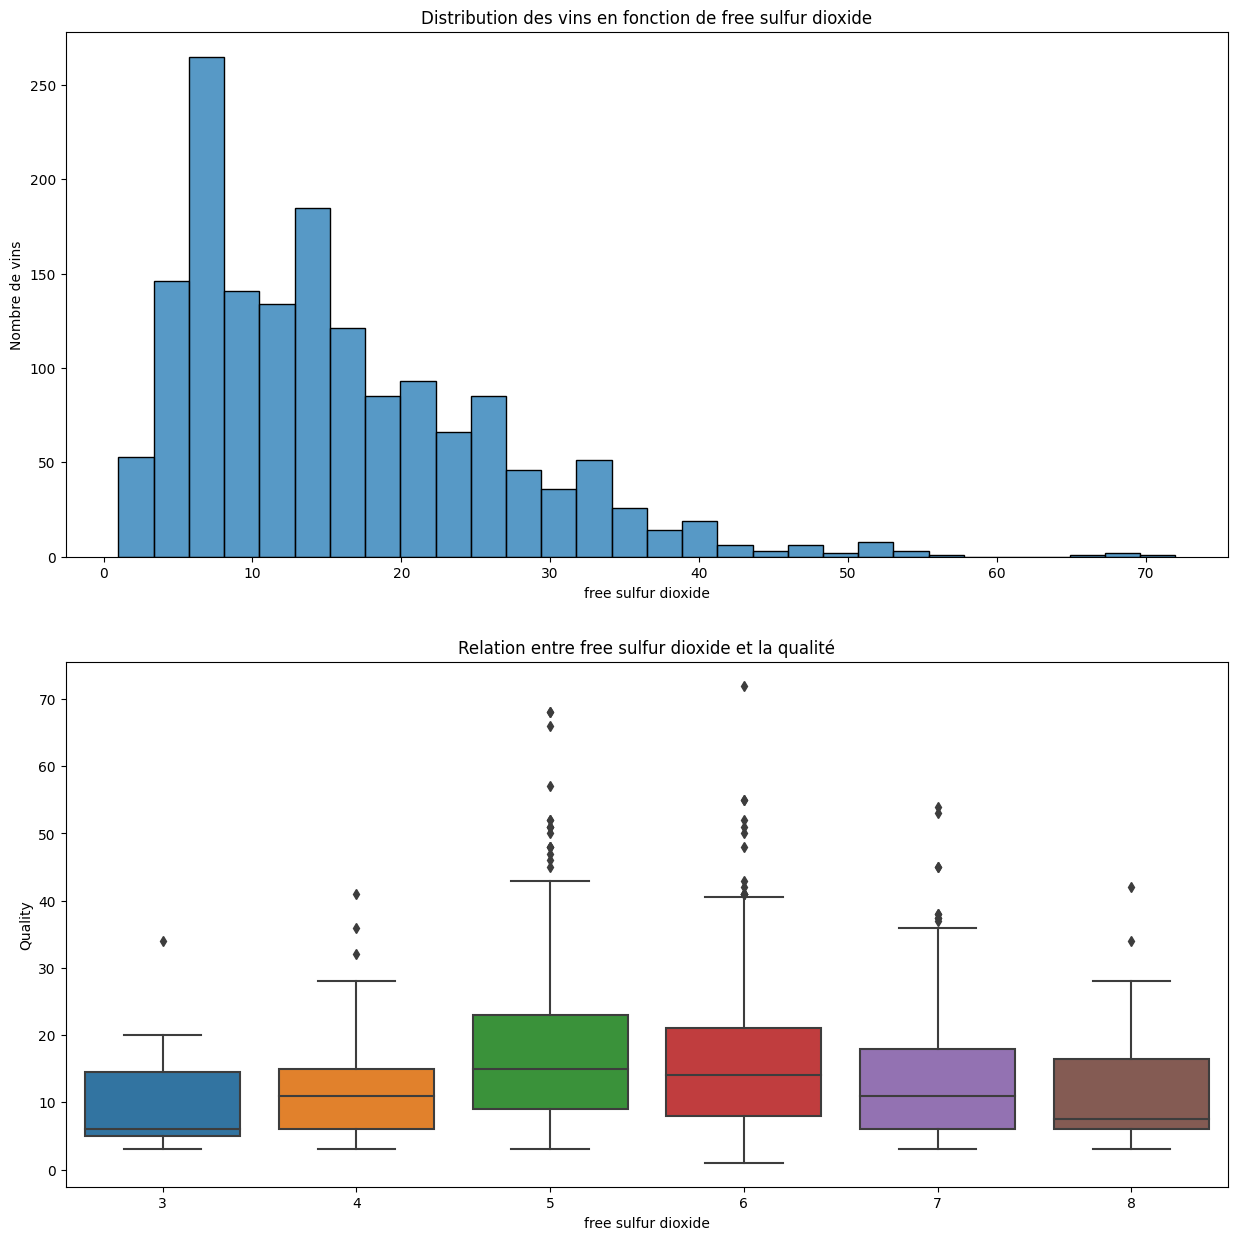

In [162]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.histplot(data=df_wine,x='free sulfur dioxide', ax=ax1)
ax1.set_xlabel('free sulfur dioxide')
ax1.set_ylabel('Nombre de vins')
ax1.set_title('Distribution des vins en fonction de free sulfur dioxide')

sns.boxplot(data=df_wine, x='quality', y='free sulfur dioxide', ax=ax2)
ax2.set_xlabel('free sulfur dioxide')
ax2.set_ylabel('Quality')
ax2.set_title("Relation entre free sulfur dioxide et la qualité")

### Qualité et total sulfur dioxide	

In [163]:
corr_total_sulfur_dioxide = df_wine.corrwith(df_wine['quality'])["total sulfur dioxide"]
corr_total_sulfur_dioxide

-0.1851002889265378

Text(0.5, 1.0, 'Relation entre total sulfur dioxide et la qualité')

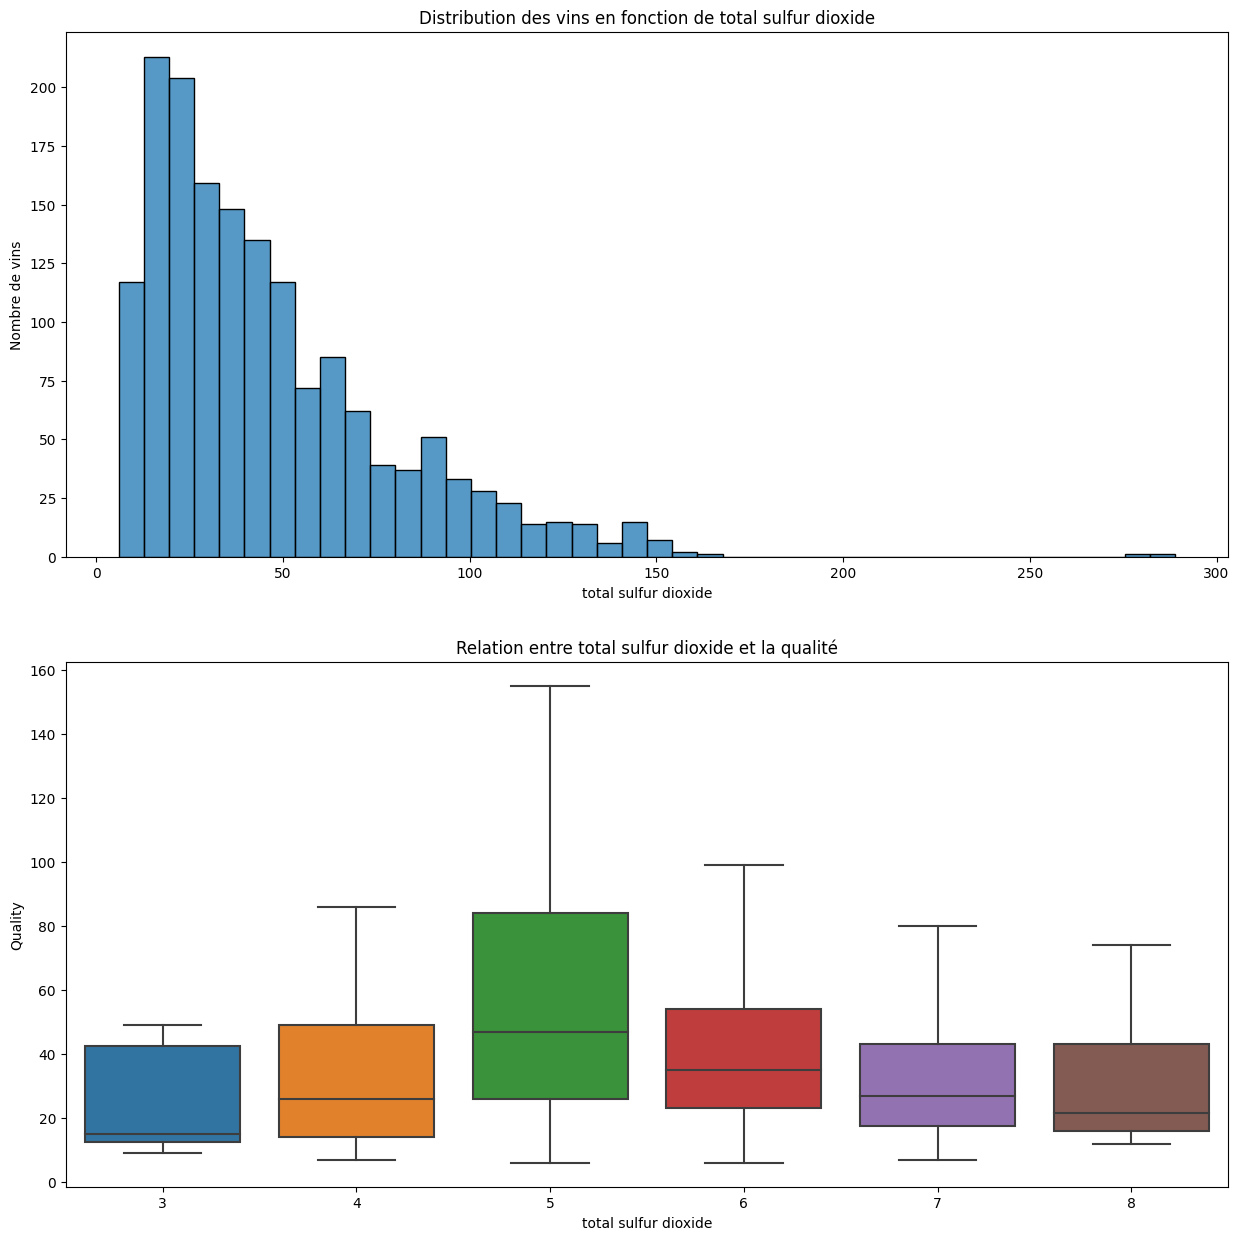

In [164]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.histplot(data=df_wine,x='total sulfur dioxide', ax=ax1)
ax1.set_xlabel('total sulfur dioxide')
ax1.set_ylabel('Nombre de vins')
ax1.set_title('Distribution des vins en fonction de total sulfur dioxide')

sns.boxplot(data=df_wine, x='quality', y='total sulfur dioxide', ax=ax2,showfliers=False)
ax2.set_xlabel('total sulfur dioxide')
ax2.set_ylabel('Quality')
ax2.set_title("Relation entre total sulfur dioxide et la qualité")


### Qualité et density	

In [165]:
corr_density = df_wine.corrwith(df_wine['quality'])["density"]
corr_density

-0.17491922778334879

Text(0.5, 1.0, 'Relation entre density et la qualité')

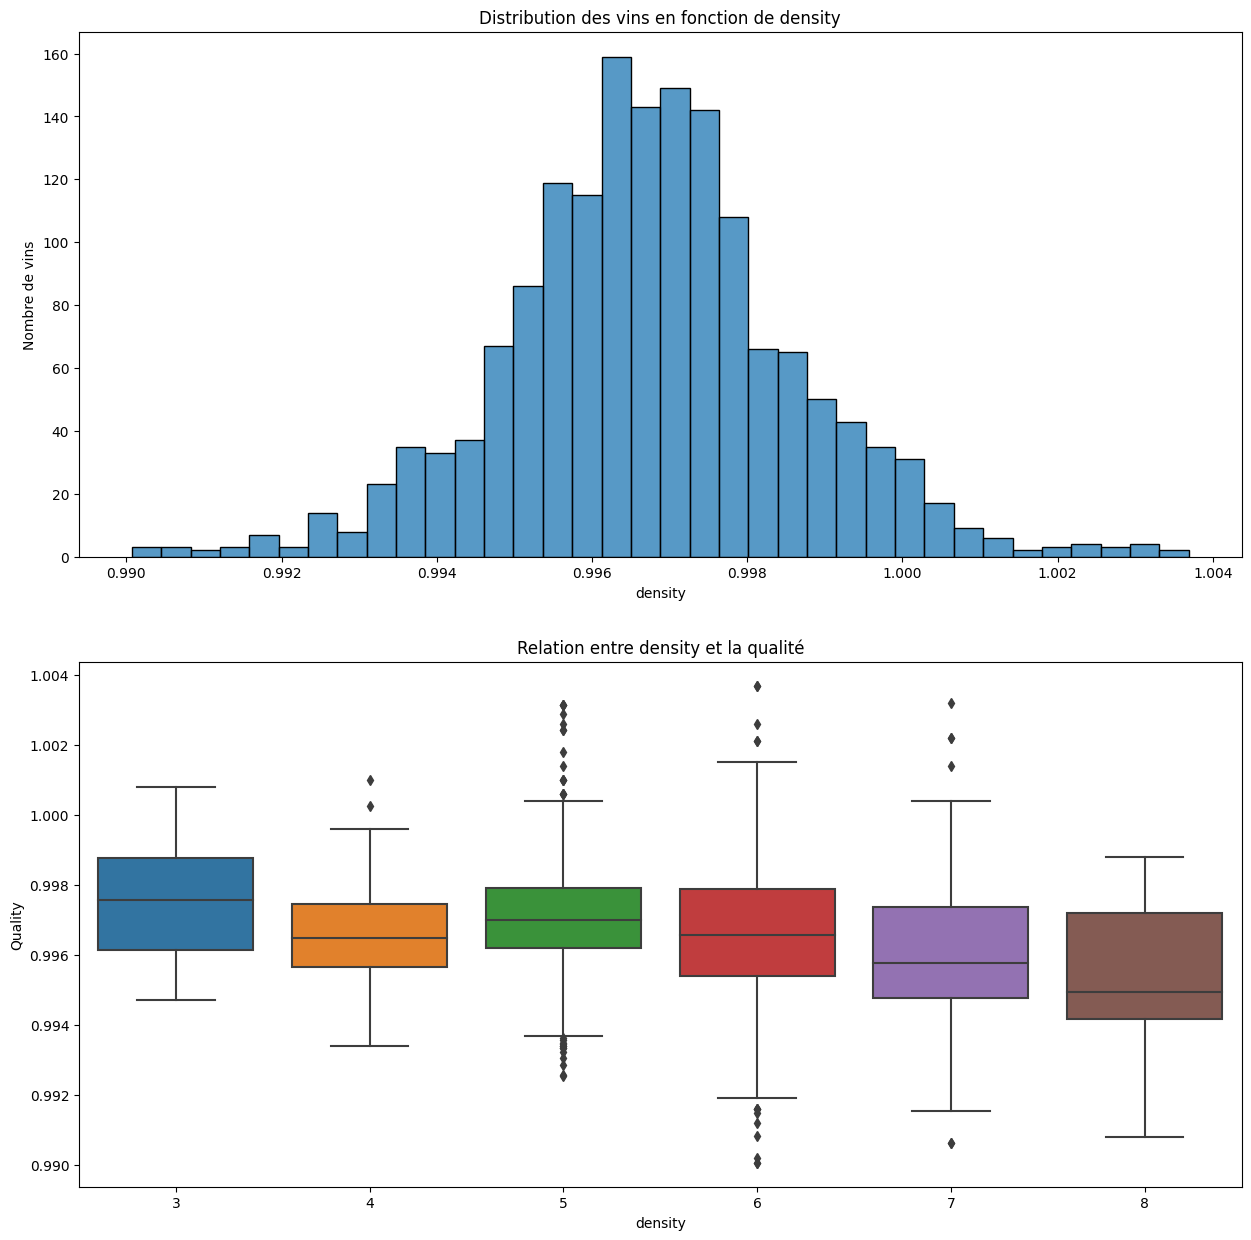

In [166]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.histplot(data=df_wine,x='density', ax=ax1)
ax1.set_xlabel('density')
ax1.set_ylabel('Nombre de vins')
ax1.set_title('Distribution des vins en fonction de density')

sns.boxplot(data=df_wine, x='quality', y='density', ax=ax2)
ax2.set_xlabel('density')
ax2.set_ylabel('Quality')
ax2.set_title("Relation entre density et la qualité")

### Qualité et pH	

In [167]:
corr_ph = df_wine.corrwith(df_wine['quality'])["pH"]
corr_ph

-0.057731391205382156

Text(0.5, 1.0, 'Relation entre le pH et la qualité')

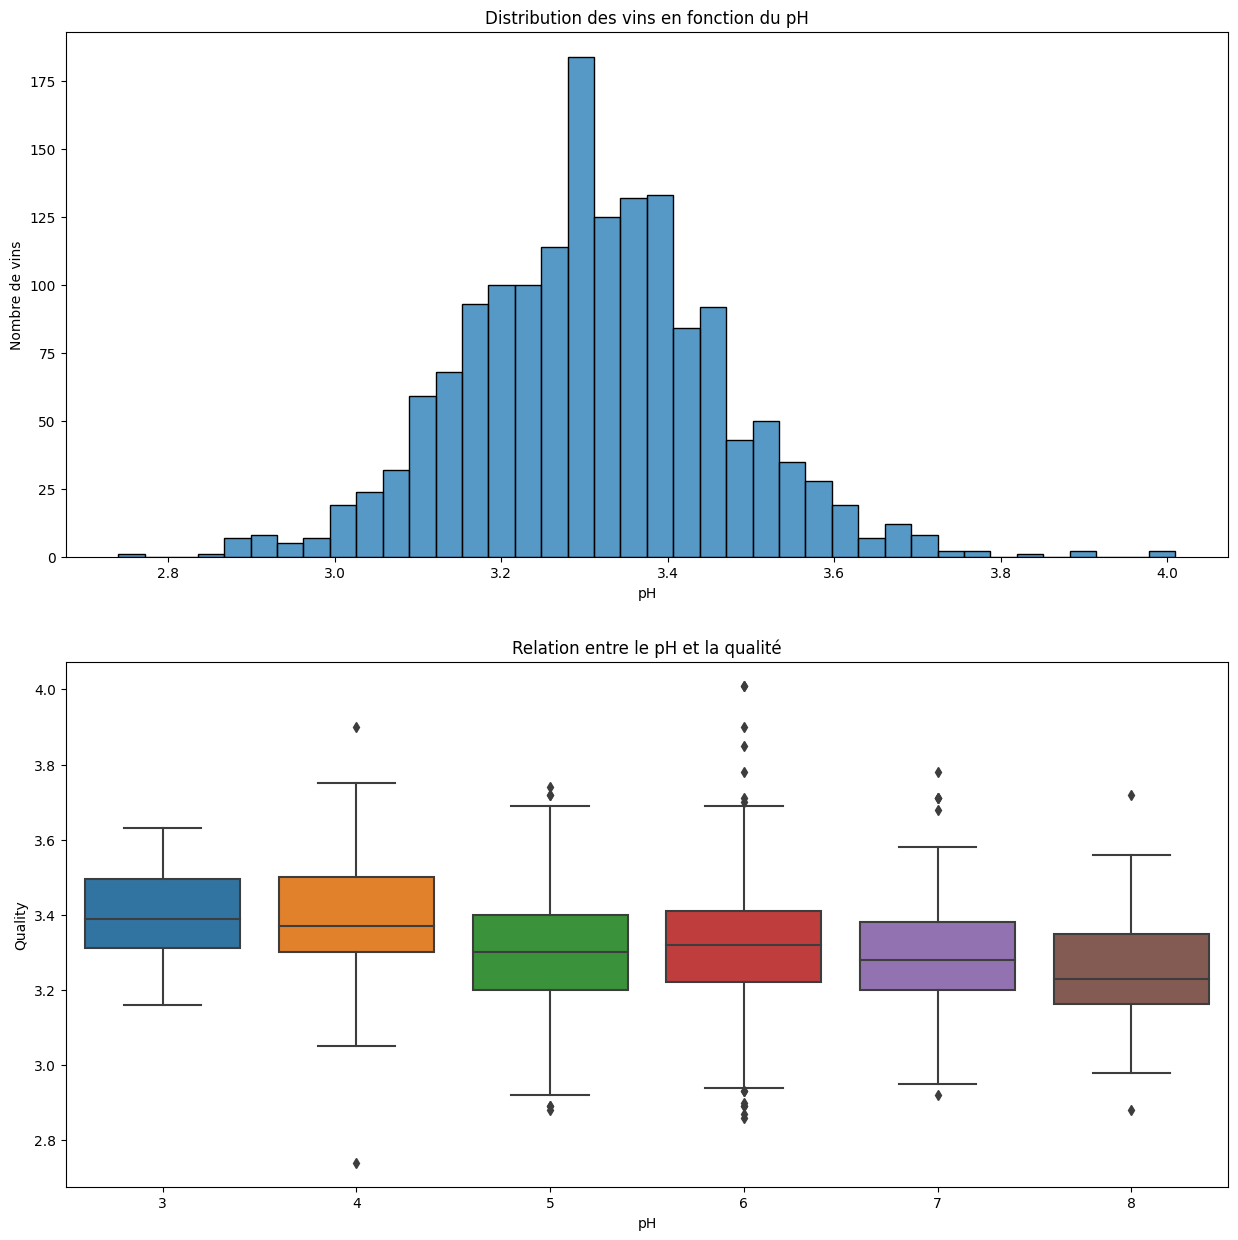

In [168]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.histplot(data=df_wine,x='pH', ax=ax1)
ax1.set_xlabel('pH')
ax1.set_ylabel('Nombre de vins')
ax1.set_title('Distribution des vins en fonction du pH')

sns.boxplot(data=df_wine, x='quality', y='pH', ax=ax2)
ax2.set_xlabel('pH')
ax2.set_ylabel('Quality')
ax2.set_title("Relation entre le pH et la qualité")

### Qualité et sulphates	

In [169]:
corr_sulphates = df_wine.corrwith(df_wine['quality'])["sulphates"]
corr_sulphates

0.2513970790692613

Text(0.5, 1.0, 'Relation entre sulphates et la qualité')

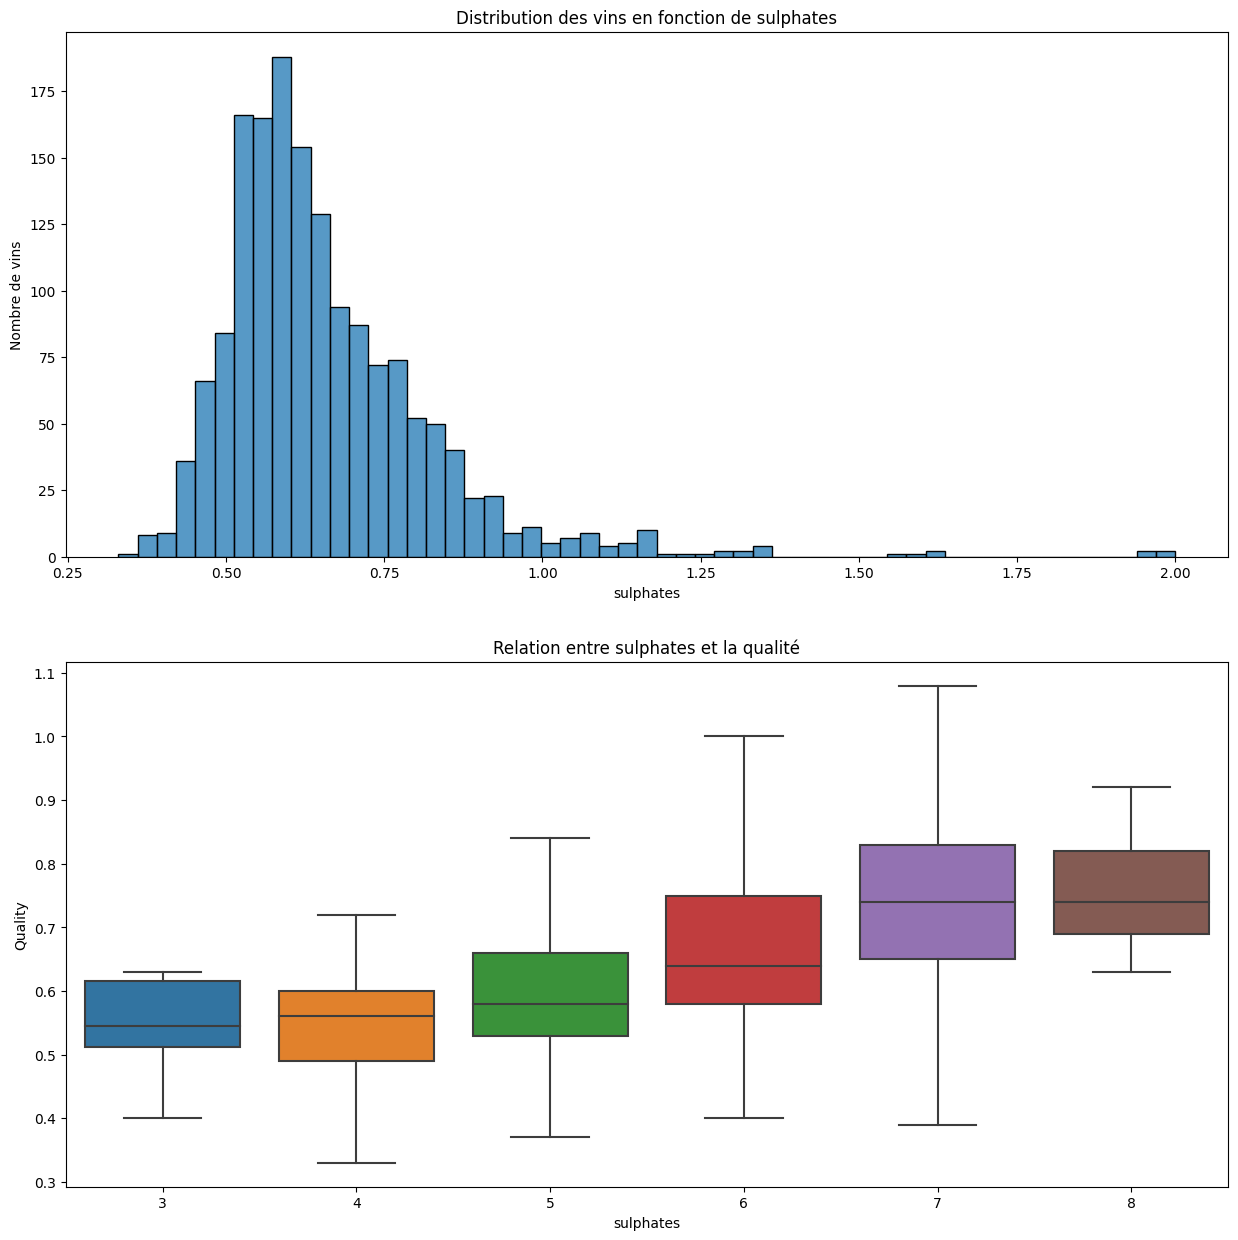

In [170]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.histplot(data=df_wine,x='sulphates', ax=ax1)
ax1.set_xlabel('sulphates')
ax1.set_ylabel('Nombre de vins')
ax1.set_title('Distribution des vins en fonction de sulphates')

sns.boxplot(data=df_wine, x='quality', y='sulphates', ax=ax2,showfliers=False)
ax2.set_xlabel('sulphates')
ax2.set_ylabel('Quality')
ax2.set_title("Relation entre sulphates et la qualité")

### Qualité et alcohol

In [171]:
corr_alcohol = df_wine.corrwith(df_wine['quality'])["alcohol"]
corr_alcohol

0.4761663240011359

Text(0.5, 1.0, "Relation entre l'alcohol et la qualité")

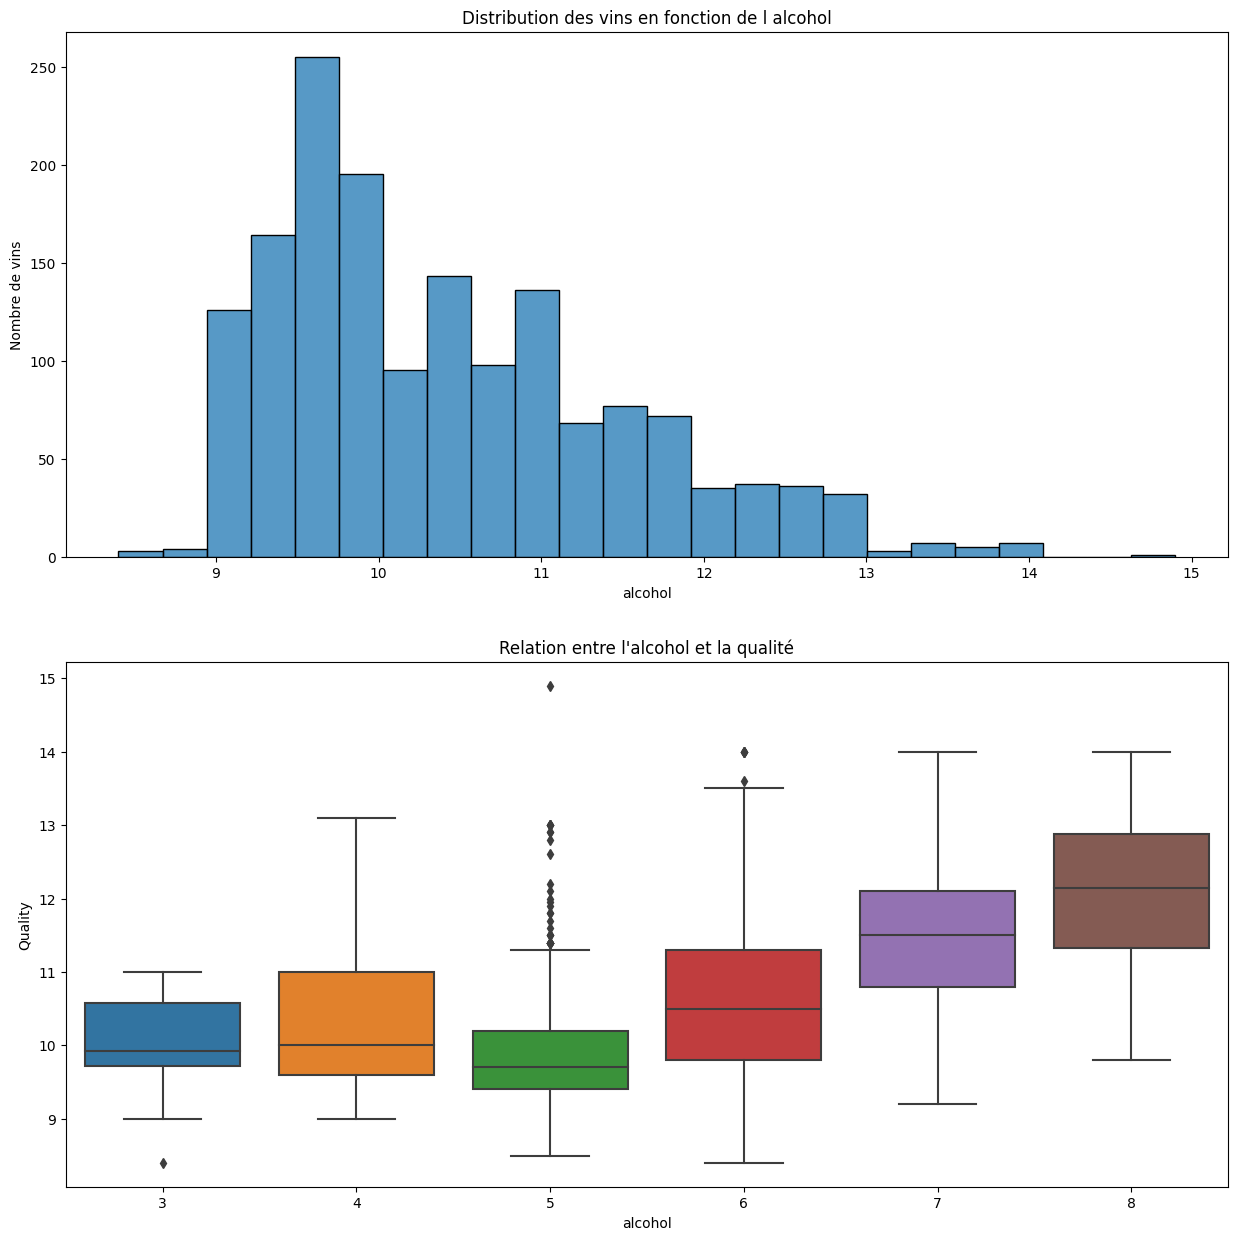

In [172]:
f, (ax1,ax2) = plt.subplots(2,1)
f.set_size_inches(15,15)
sns.histplot(data=df_wine,x='alcohol', ax=ax1)
ax1.set_xlabel('alcohol')
ax1.set_ylabel('Nombre de vins')
ax1.set_title('Distribution des vins en fonction de l alcohol')

sns.boxplot(data=df_wine, x='quality', y='alcohol', ax=ax2)
ax2.set_xlabel('alcohol')
ax2.set_ylabel('Quality')
ax2.set_title("Relation entre l'alcohol et la qualité")